In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot(list):
    step_wise_loss = []
    ap_class0 =[]
    ap_class1 =[]
    ap_class2 =[]
    ap_class3 =[]
    disappearance = []
    hallucinations = []
    misclassification = []
    tpr = []
    loss_epoch = []
    for j in range(len(list)):
        item = list[j].split()
        if item[0] == 'Epoch:':
            for i in range(len(item)):
                if item[i] == 'loss:':
                    step_wise_loss.append(float(item[i+1]))
        elif item[0] == 'AP_per_class:':
            num0 = item[2].split(',')
            num1 = item[4].split(',')
            num2 = item[6].split(',')
            num3 = item[8].split(',')
            ap_class0.append(float(num0[0]))
            ap_class1.append(float(num1[0]))
            ap_class2.append(float(num2[0]))
            ap_class3.append(float(num3[0]))
        elif item[0] == 'disappearance_rate:':
            disappearance.append(float(item[1]))
        elif item[0] == 'hallucinations_per_image:':
            hallucinations.append(float(item[1]))
        elif item[0] == 'misclassification_rate:':
            misclassification.append(float(item[1]))
        elif item[0] == 'true_positive_rate:':
            tpr.append(float(item[1]))
        elif item[0] =='Averaged':
            for i in range(len(item)):
                if item[i] == 'loss:':
                    loss_epoch.append(float(item[i+1]))
    train_loss = []
    test_loss = []
    for i in range(len(loss_epoch)):
        if (i & 1) == 0:
            train_loss.append(loss_epoch[i])
        else:
            test_loss.append(loss_epoch[i])
    
    ## Plotting step-wise train loss curve:
    plt.plot(step_wise_loss[20:], label = 'train_loss', color = 'orange')
    plt.xlabel('Batch Number')
    plt.ylabel('Step-wise Loss')
    plt.legend()
    plt.show()

    ## Plotting epoch-wise train&test loss curve:
    fig, ax = plt.subplots()
    ax.plot(train_loss, label = 'train_loss')
    ax.plot(test_loss, label = 'test_loss')
    plt.xlabel('Epoch Number')
    plt.ylabel('Loss At each epoch')
    plt.legend()
    plt.show()

    ## Plotting epoch-wise accuracy curve for each cluster:
    fig, ax = plt.subplots()
    ax.plot(ap_class0, label = 'test_perc_class0')
    ax.plot(ap_class1, label = 'test_perc_class1')
    ax.plot(ap_class2, label = 'tesr_perc_class2')
    ax.plot(ap_class3, label = 'test_perc_class3')
    plt.xlabel('Epoch Number')
    plt.ylabel('Average Precision')
    plt.legend()
    plt.show()

    ## Plotting epoch-wise evaluation:
    fig, axs = plt.subplots(2, 2, figsize=(10,8), constrained_layout=True)
    axs[0, 0].plot(disappearance)
    axs[0, 0].set_title('Disappearance Rate')
    axs[0, 1].plot(hallucinations)
    axs[0, 1].set_title('Hallucinations Rate')
    axs[1, 0].plot(misclassification)
    axs[1, 0].set_title('Misclassification Rate')
    axs[1, 1].plot(tpr)
    axs[1, 1].set_title('True Positive Rate')
    for ax in axs.flat:
        ax.set(xlabel ='Epoch Number')
    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
    
    

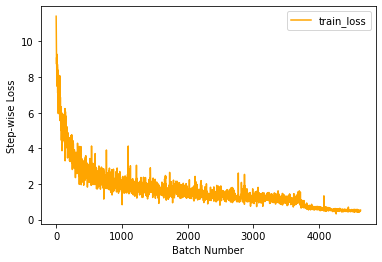

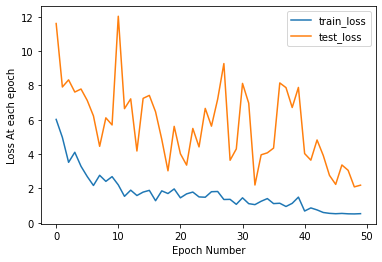

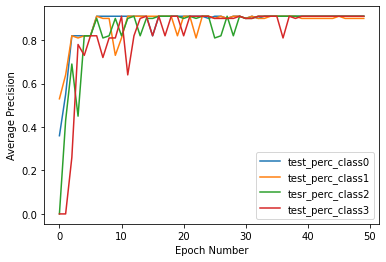

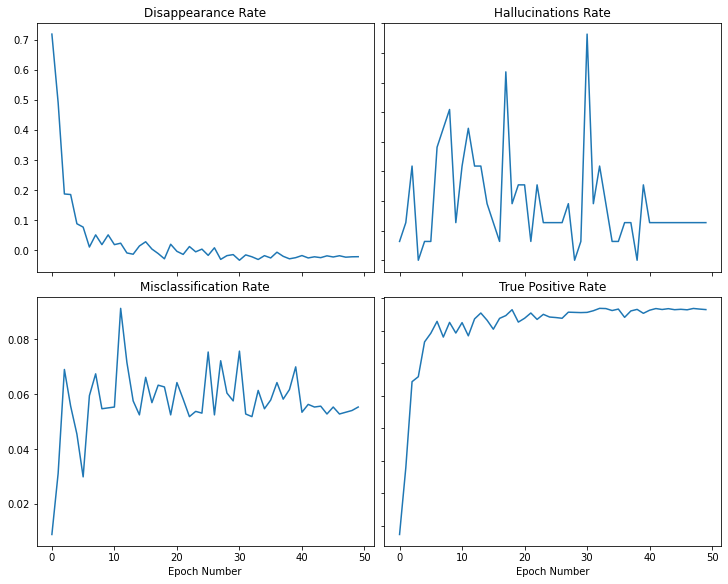

In [9]:
file_name = 'log_train_R50_pretrain_num_classes_4_detr+1_setting_with_box_refine.txt'
df = pd.read_table(file_name)
list = df['| distributed init (rank 1): env://'].tolist()
plot(list=list)

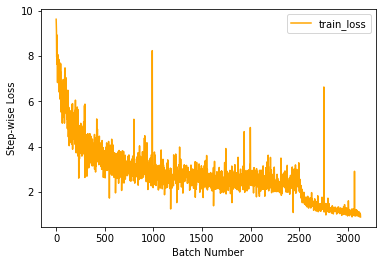

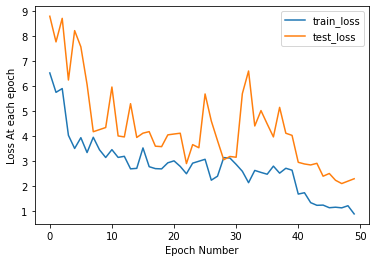

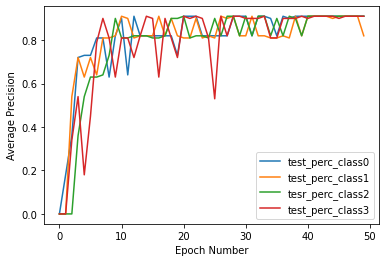

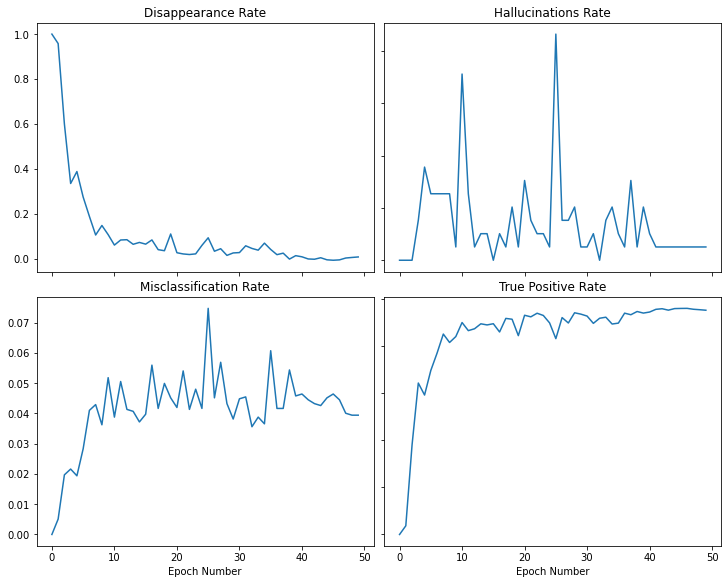

In [10]:
file_name1 = 'log_train_R50_pretrain_num_classes_4_detr+1_setting.txt'
df = pd.read_table(file_name1)
list = df['| distributed init (rank 0): env://'].tolist()
plot(list=list)

# Randomize Size

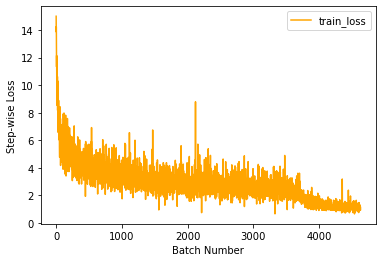

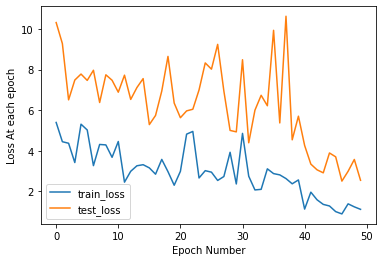

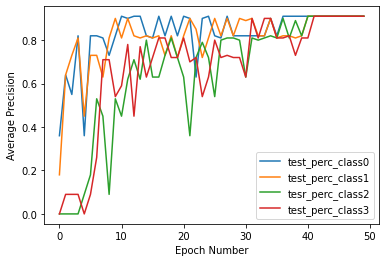

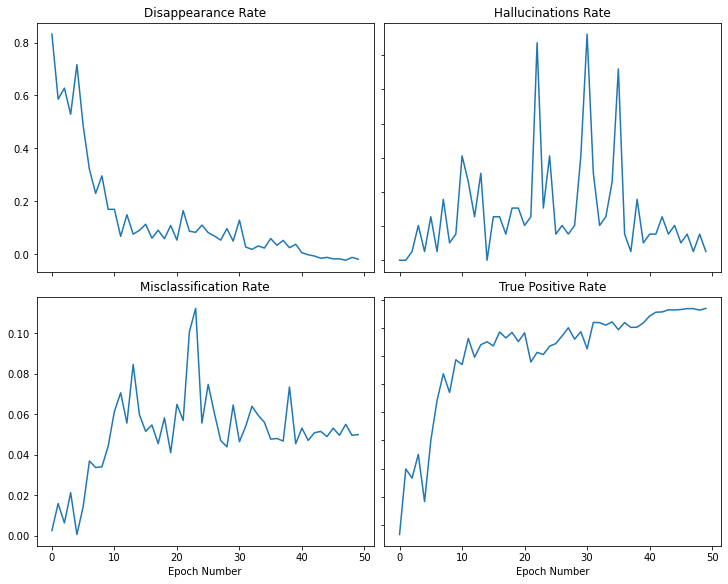

In [4]:
file_name = 'log_train_R50_pretrain_num_classes_4_detr+1_setting_with_box_refine_more_resize.txt'
df = pd.read_table(file_name)
list = df['| distributed init (rank 0): env://'].tolist()
plot(list=list)

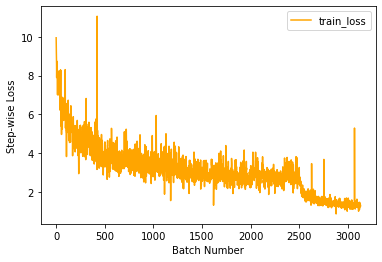

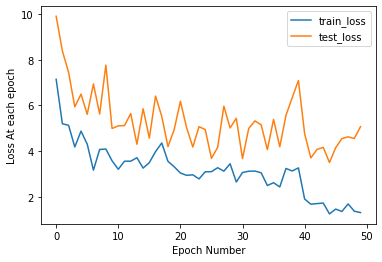

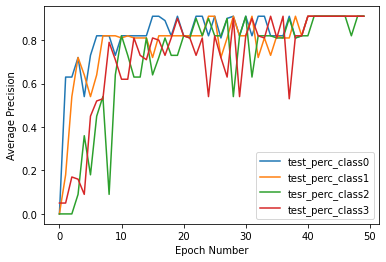

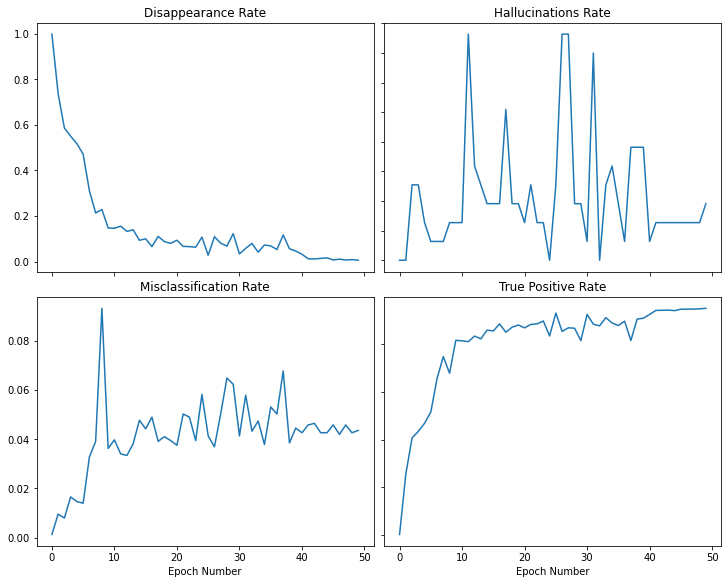

In [5]:
file_name = 'log_train_R50_pretrain_num_classes_4_detr+1_setting_more_resize.txt'
df = pd.read_table(file_name)
list = df['| distributed init (rank 0): env://'].tolist()
plot(list=list)

# Try（Save for debug, useless part.）

In [ ]:
step_wise_loss = []
ap_class0 =[]
ap_class1 =[]
ap_class2 =[]
ap_class3 =[]
disappearance = []
hallucinations = []
misclassification = []
tpr = []
loss_epoch = []
for j in range(len(list)):
    item = list[j].split()
    if item[0] == 'Epoch:':
        for i in range(len(item)):
            if item[i] == 'loss:':
                step_wise_loss.append(float(item[i+1]))
    elif item[0] == 'AP_per_class:':
        num0 = item[2].split(',')
        num1 = item[4].split(',')
        num2 = item[6].split(',')
        num3 = item[8].split(',')
        ap_class0.append(float(num0[0]))
        ap_class1.append(float(num1[0]))
        ap_class2.append(float(num2[0]))
        ap_class3.append(float(num3[0]))
    elif item[0] == 'disappearance_rate:':
        disappearance.append(float(item[1]))
    elif item[0] == 'hallucinations_per_image:':
        hallucinations.append(float(item[1]))
    elif item[0] == 'misclassification_rate:':
        misclassification.append(float(item[1]))
    elif item[0] == 'true_positive_rate:':
        tpr.append(float(item[1]))
    elif item[0] =='Averaged':
        for i in range(len(item)):
            if item[i] == 'loss:':
                loss_epoch.append(float(item[i+1]))

In [ ]:
train_loss = []
test_loss = []
for i in range(len(loss_epoch)):
    if (i & 1) == 0:
        train_loss.append(loss_epoch[i])
    else:
        test_loss.append(loss_epoch[i])

In [ ]:
## Plotting epoch-wise train loss curve:
plt.plot(step_wise_loss[20:], label = 'train_loss', color = 'orange')
plt.xlabel('Batch Number')
plt.ylabel('Step-wise Loss')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(train_loss, label = 'train_loss')
ax.plot(test_loss, label = 'test_loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss At each epoch')
plt.legend()
plt.show()

In [ ]:
## Plotting epoch-wise accuracy curve:
fig, ax = plt.subplots()
ax.plot(ap_class0, label = 'test_perc_class0')
ax.plot(ap_class1, label = 'test_perc_class1')
ax.plot(ap_class2, label = 'tesr_perc_class2')
ax.plot(ap_class3, label = 'test_perc_class3')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy At each epoch')
plt.legend()
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10,8), constrained_layout=True)
axs[0, 0].plot(disappearance)
axs[0, 0].set_title('Disappearance Rate')
axs[0, 1].plot(hallucinations)
axs[0, 1].set_title('Hallucinations Rate')
axs[1, 0].plot(misclassification)
axs[1, 0].set_title('Misclassification Rate')
axs[1, 1].plot(tpr)
axs[1, 1].set_title('True Positive Rate')
for ax in axs.flat:
    ax.set(xlabel ='Epoch Number')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()